In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset
# use this link: https://drive.google.com/file/d/11Fgypk2wQhYvUOk0c3VJKtHIeeZ2E-Xi/view?usp=sharing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,28.049999,28.180000,27.920000,27.980000,21.801729,53443800
1,2011-01-04,27.940001,28.170000,27.850000,28.090000,21.887434,54405600
2,2011-01-05,27.900000,28.010000,27.770000,28.000000,21.817312,58998700
3,2011-01-06,28.040001,28.850000,27.860001,28.820000,22.456242,88026300
4,2011-01-07,28.639999,28.740000,28.250000,28.600000,22.284828,73762000
...,...,...,...,...,...,...,...
3053,2023-02-21,254.479996,255.490005,251.589996,252.669998,252.669998,28397400
3054,2023-02-22,254.089996,254.339996,250.339996,251.509995,251.509995,22491100
3055,2023-02-23,255.559998,256.839996,250.479996,254.770004,254.770004,29219100
3056,2023-02-24,249.960007,251.000000,248.100006,249.220001,249.220001,24990900


In [4]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2011-01-03,27.980000
1,2011-01-04,28.090000
2,2011-01-05,28.000000
3,2011-01-06,28.820000
4,2011-01-07,28.600000
...,...,...
3053,2023-02-21,252.669998
3054,2023-02-22,251.509995
3055,2023-02-23,254.770004
3056,2023-02-24,249.220001


In [5]:
df['Date']

0       2011-01-03
1       2011-01-04
2       2011-01-05
3       2011-01-06
4       2011-01-07
           ...    
3053    2023-02-21
3054    2023-02-22
3055    2023-02-23
3056    2023-02-24
3057    2023-02-27
Name: Date, Length: 3058, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df

,Date,Close
0,2011-01-03,27.980000
1,2011-01-04,28.090000
2,2011-01-05,28.000000
3,2011-01-06,28.820000
4,2011-01-07,28.600000
...,...,...
3053,2023-02-21,252.669998
3054,2023-02-22,251.509995
3055,2023-02-23,254.770004
3056,2023-02-24,249.220001


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2011-01-03
1      2011-01-04
2      2011-01-05
3      2011-01-06
4      2011-01-07
          ...    
3053   2023-02-21
3054   2023-02-22
3055   2023-02-23
3056   2023-02-24
3057   2023-02-27
Name: Date, Length: 3058, dtype: datetime64[ns]

In [9]:
df.index = df.pop('Date')
df

,Close
Date,
2011-01-03,27.980000
2011-01-04,28.090000
2011-01-05,28.000000
2011-01-06,28.820000
2011-01-07,28.600000
...,...
2023-02-21,252.669998
2023-02-22,251.509995
2023-02-23,254.770004


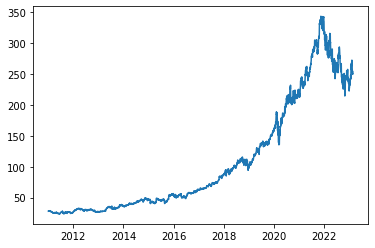

In [10]:
plt.plot(df.index, df['Close']);

In [11]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

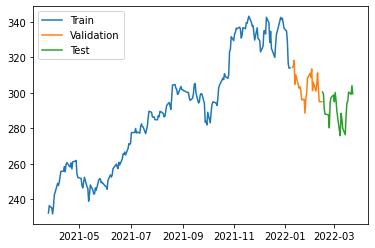

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test']);

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 116ms/step - loss: 84407.6328 - mean_absolute_error: 288.7857 - val_loss: 92029.2578 - val_mean_absolute_error: 303.2759
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 84046.4453 - mean_absolute_error: 288.1591 - val_loss: 91554.5078 - val_mean_absolute_error: 302.4922
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 83545.8516 - mean_absolute_error: 287.2899 - val_loss: 90964.0234 - val_mean_absolute_error: 301.5146
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 82962.2422 - mean_absolute_error: 286.2714 - val_loss: 90324.7109 - val_mean_absolute_error: 300.4526
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 82348.7500 - mean_absolute_error: 285.2041 - val_loss: 89662.7266 - val_mean_absolute_error: 299.3489
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 81672.5234 - mean_absolute_error: 284.0130 - val_loss: 88

7/7 [==============================] - 0s 3ms/step


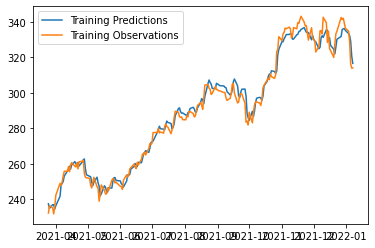

In [15]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations']);

In [16]:
from sklearn.metrics import mean_squared_error
print('RMSE for train set:',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for train set: 4.116212


1/1 [==============================] - 0s 30ms/step


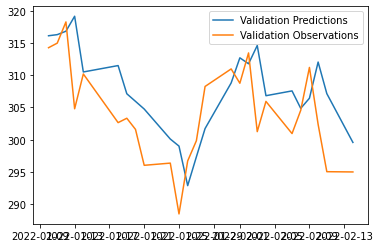

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations']);

In [18]:
print('RMSE for validation set:',np.sqrt(mean_squared_error(y_val,val_predictions)))

RMSE for validation set: 6.691709


1/1 [==============================] - 0s 33ms/step


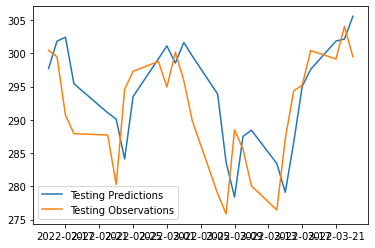

In [19]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations']);

In [20]:
print('RMSE for test set:',np.sqrt(mean_squared_error(y_test,test_predictions)))

RMSE for test set: 7.069123


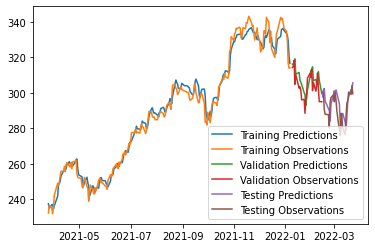

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations']);

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 34ms/step


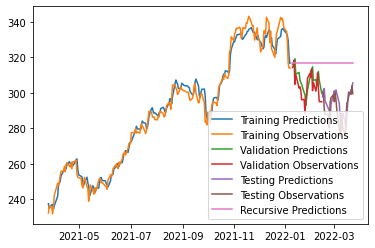

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions']);